<a href="https://colab.research.google.com/github/ommore1212/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dependencies


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Car Price Prediction/CAR DETAILS FROM CAR DEKHO.csv')

In [6]:
dataset.shape

(4340, 8)

In [7]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [22]:
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.name.value_counts())

print(dataset.owner.value_counts())

fuel
0    2153
1    2123
2      40
3      23
4       1
Name: count, dtype: int64
seller_type
1    3244
2     994
3     102
Name: count, dtype: int64
transmission
1    3892
0     448
Name: count, dtype: int64
name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [15]:
# Diesel      0
# Petrol      1
# CNG         2
# LPG         3
# Electric    4

#encoding fuel type
dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

<ipython-input-15-1483acc3cc02>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)


In [16]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,Individual,Manual,Second Owner


In [17]:
# seller_type
# Individual          1
# Dealer              2
# Trustmark Dealer    3
dataset.replace({'seller_type':{'Individual':1,'Dealer':2,'Trustmark Dealer':3}},inplace=True)

<ipython-input-17-9595c1a1c26c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'seller_type':{'Individual':1,'Dealer':2,'Trustmark Dealer':3}},inplace=True)


In [18]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,1,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,Manual,Second Owner


In [19]:
# transmission
# Manual        1
# Automatic     0
dataset.replace({'transmission':{'Manual':1,'Automatic':0}},inplace=True)

<ipython-input-19-0df9b311e988>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'transmission':{'Manual':1,'Automatic':0}},inplace=True)


In [20]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,1,Second Owner


In [23]:
# owner
# First Owner             1
# Second Owner            2
# Third Owner             3
# Fourth & Above Owner    4
# Test Drive Car          5
dataset.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)


<ipython-input-23-9b01b5ccc68a>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)


In [24]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,1,2


#Train & Test Split


In [25]:
x = dataset.drop(['name','selling_price'],axis=1)
y = dataset['selling_price']

In [27]:
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            1             1      1
1     2007      50000     1            1             1      1
2     2012     100000     0            1             1      1
3     2017      46000     1            1             1      1
4     2014     141000     0            1             1      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            1             1      2
4336  2014      80000     0            1             1      2
4337  2009      83000     1            1             1      2
4338  2016      90000     0            1             1      1
4339  2016      40000     1            1             1      1

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

#Model training

LinearRegression

In [29]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)


LinearRegression()

#Model Evaluation


In [31]:
# accuracy on train data
x_train_prediction = model_lin.predict(x_train)


In [34]:
# R squared error
error_score = metrics.r2_score(y_train,x_train_prediction)
print("R squared error : ",error_score)

R squared error :  0.44307875879219416


# Visualization


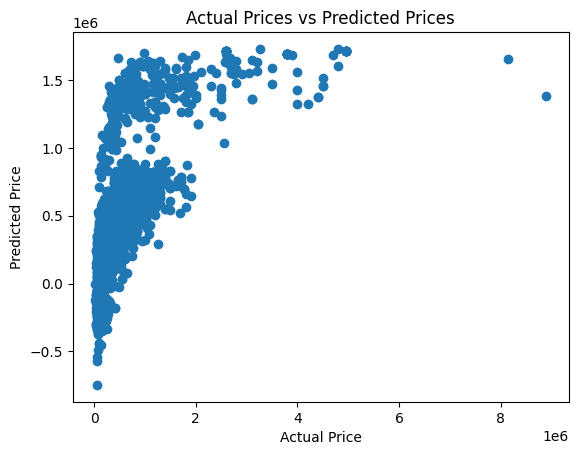

In [36]:
plt.scatter(y_train,x_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# accuracy on test data
x_test_prediction = model_lin.predict(x_test)


In [38]:
# R squared error
error_score = metrics.r2_score(y_test,x_test_prediction)
print("R squared error : ",error_score)

R squared error :  0.5212912933220215
